<a href="https://colab.research.google.com/github/ananyasen/livelab-sept21/blob/main/LouisvilleDocklessTrips_02-01-2020_07-08-2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business School of AI
## LiveLab September 21 : Machine Learning on mobility data
- setup your environment and upload your dataset
- clean your data
- exploratory data analysis
- find dependencies between variables
- data visualisation
- predicting trip duration with machine learning
- refine your predictive performance with feature reduction technique

#### Note: COVID Lockdown trend February to June, 2020. This data analysis is done on the data record file https://data.louisvilleky.gov/dataset/dockless-vehicles/resource/e36546f6-888b-4e66-8a87-9b68cab471e6#{view-graph:{graphOptions:{hooks:{processOffset:{},bindEvents:{}}}},graphOptions:{hooks:{processOffset:{},bindEvents:{}}}}

In [1]:
# setup your coding environment
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



#### note: if you miss any library at the import, you can install it with
!pip install libraryname

#### to import the dataset from your drive to your colab, you'll need to execute the following code:

- it will ask you to copy/paste a validation code on this notebook
- it will say "Mounted at /content/gdrive" when done.

In [2]:
from google.colab import drive 
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
# upload your dataset
dockless = pd.read_csv('/content/gdrive/My Drive/Louisville-Dockless-Trips.csv')

In [4]:
# check dataset size
dockless.shape

(32962, 13)

In [5]:
# preview dataset content
dockless.head()

TripID StartDate StartTime   EndDate EndTime  \
0  dd62d00f-11cf-5a7b-b6df-a1917e90eb09  2/1/2020      8:15  2/1/2020    8:30   
1  ea963a4b-b2b9-5ab9-8442-cbff3878e32c  2/1/2020      8:30  2/1/2020    8:45   
2  d081f7b8-5d6f-54a8-adf1-fa2c931b8440  2/1/2020      8:45  2/1/2020    8:45   
3  135100da-29e7-5e7b-b150-73784e2d983f  2/1/2020      9:00  2/1/2020    9:00   
4  2fea57ae-fb0e-5538-85a3-749d4854cfcd  2/1/2020      9:15  2/1/2020    9:30   

   TripDuration  TripDistance  StartLatitude  StartLongitude  EndLatitude  \
0            14         1.358         38.233         -85.741       38.245   
1             6         0.195         38.257         -85.756       38.255   
2             3         0.118         38.256         -85.757       38.257   
3             3         0.252         38.217         -85.763       38.220   
4            16         0.434         38.224         -85.759       38.228   

   EndLongitude  DayOfWeek  HourNum  
0       -85.759          7        8  
1       -85.758          7        8  
2       -85.757          7        8  
3       -85.762          7        9  
4       -85.758          7        9

### 1. Clean dataset: 
- rename header in lowercase (show error in calling it first)
- delete outliers (tripdistance == 0.000) 
- rename DayOfWeek values

In [6]:
# you want to check if trip duration column has null values
dockless['TripDuration'].isna().sum()
# it raises an error. 
# you messed the spelling with uppercase/lowercase (common mistake)

0

In [7]:
# to avoid errors in spelling, keep it simple
# rename all your headers with lowercase
dockless.columns= dockless.columns.str.lower()
dockless.head()

tripid startdate starttime   enddate endtime  \
0  dd62d00f-11cf-5a7b-b6df-a1917e90eb09  2/1/2020      8:15  2/1/2020    8:30   
1  ea963a4b-b2b9-5ab9-8442-cbff3878e32c  2/1/2020      8:30  2/1/2020    8:45   
2  d081f7b8-5d6f-54a8-adf1-fa2c931b8440  2/1/2020      8:45  2/1/2020    8:45   
3  135100da-29e7-5e7b-b150-73784e2d983f  2/1/2020      9:00  2/1/2020    9:00   
4  2fea57ae-fb0e-5538-85a3-749d4854cfcd  2/1/2020      9:15  2/1/2020    9:30   

   tripduration  tripdistance  startlatitude  startlongitude  endlatitude  \
0            14         1.358         38.233         -85.741       38.245   
1             6         0.195         38.257         -85.756       38.255   
2             3         0.118         38.256         -85.757       38.257   
3             3         0.252         38.217         -85.763       38.220   
4            16         0.434         38.224         -85.759       38.228   

   endlongitude  dayofweek  hournum  
0       -85.759          7        8  
1       -85.758          7        8  
2       -85.757          7        8  
3       -85.762          7        9  
4       -85.758          7        9

In [8]:
# now check null values with simplified spelling
dockless['tripduration'].isna().sum()

0

In [9]:
# there are no null values recorded (it means each data point has a value recorded)
# but imagine you want to get rid of meaningless data points (such as trip distance = 0.00)
(dockless['tripdistance']==0).sum()

328

In [10]:
# delete data points where trip distance == 0 (it might affect your prediction performance)
dockless = dockless[dockless['tripdistance'] != 0]

In [11]:
# check for dataset size again
dockless.shape

(32634, 13)

In [12]:
# get unique values from dayofweek column
dockless['dayofweek'].unique()
# there are 7 days in the week, alright! but which one is 1st in their calendar ?

array([7, 1, 2, 3, 4, 5, 6])

In [15]:
# import datetime module
import datetime

# from your dataset preview, fill the date where dayofweek == 1
print(datetime.date(2020,2,2).strftime('%A'))

Sunday


In [16]:
# create a dictionnary of values
days = {1: "Sunday",
        2: "Monday",
        3: "Tuesday",
        4: "Wednesday",
        5: "Thursday",
        6: "Friday",
        7: "Saturday"
       }

# replace numbers by words in column 'dayofweek'
dockless['dayofweek'] = dockless['dayofweek'].replace(days)

In [17]:
dockless.head()

tripid startdate starttime   enddate endtime  \
0  dd62d00f-11cf-5a7b-b6df-a1917e90eb09  2/1/2020      8:15  2/1/2020    8:30   
1  ea963a4b-b2b9-5ab9-8442-cbff3878e32c  2/1/2020      8:30  2/1/2020    8:45   
2  d081f7b8-5d6f-54a8-adf1-fa2c931b8440  2/1/2020      8:45  2/1/2020    8:45   
3  135100da-29e7-5e7b-b150-73784e2d983f  2/1/2020      9:00  2/1/2020    9:00   
4  2fea57ae-fb0e-5538-85a3-749d4854cfcd  2/1/2020      9:15  2/1/2020    9:30   

   tripduration  tripdistance  startlatitude  startlongitude  endlatitude  \
0            14         1.358         38.233         -85.741       38.245   
1             6         0.195         38.257         -85.756       38.255   
2             3         0.118         38.256         -85.757       38.257   
3             3         0.252         38.217         -85.763       38.220   
4            16         0.434         38.224         -85.759       38.228   

   endlongitude dayofweek  hournum  
0       -85.759  Saturday        8  
1       -85.758  Saturday        8  
2       -85.757  Saturday        8  
3       -85.762  Saturday        9  
4       -85.758  Saturday        9

In [18]:
# check hournum column
dockless['hournum'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,  7, 21,  6, 22,
       23])

In [19]:
# check number of hours listed
len(dockless['hournum'].unique())

18

In [20]:
# create a dictionary of values
midnight = {24: 0,
            '24:00': '00:00'}

# hournum is read as an integer number, not as a string. convert it first
dockless['hournum'] = dockless['hournum'].astype(object)

# replace 24 with 0
dockless['hournum'] = dockless['hournum'].replace(midnight)
# same with starttime and endtime columns
dockless['starttime'] = dockless['starttime'].replace(midnight)
dockless['endtime'] = dockless['endtime'].replace(midnight)

In [21]:
dockless['hournum'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,  7, 21,  6, 22,
       23])

In [22]:
dockless.head()

tripid startdate starttime   enddate endtime  \
0  dd62d00f-11cf-5a7b-b6df-a1917e90eb09  2/1/2020      8:15  2/1/2020    8:30   
1  ea963a4b-b2b9-5ab9-8442-cbff3878e32c  2/1/2020      8:30  2/1/2020    8:45   
2  d081f7b8-5d6f-54a8-adf1-fa2c931b8440  2/1/2020      8:45  2/1/2020    8:45   
3  135100da-29e7-5e7b-b150-73784e2d983f  2/1/2020      9:00  2/1/2020    9:00   
4  2fea57ae-fb0e-5538-85a3-749d4854cfcd  2/1/2020      9:15  2/1/2020    9:30   

   tripduration  tripdistance  startlatitude  startlongitude  endlatitude  \
0            14         1.358         38.233         -85.741       38.245   
1             6         0.195         38.257         -85.756       38.255   
2             3         0.118         38.256         -85.757       38.257   
3             3         0.252         38.217         -85.763       38.220   
4            16         0.434         38.224         -85.759       38.228   

   endlongitude dayofweek  hournum  
0       -85.759  Saturday        8  
1       -85.758  Saturday        8  
2       -85.757  Saturday        8  
3       -85.762  Saturday        9  
4       -85.758  Saturday        9

### 2. Exploratory Data Analysis:
- look at some distribution, calculate mean and standard dev
- plot histogram of distribution depending on day of the week => which day is more crowded?
- same with hour => which hour of the day is more crowded?

In [23]:
# calculate the mean of trip duration
dockless['tripduration'].mean()

21.1130722559294

In [24]:
# check standard deviation
dockless['tripduration'].std()
# pretty scattered distribution! 

24.112048552613434

In [25]:
# check more descriptive statistics
dockless['tripduration'].describe()

count    32634.000000
mean        21.113072
std         24.112049
min          0.000000
25%          5.000000
50%         13.000000
75%         29.000000
max       1013.000000
Name: tripduration, dtype: float64

In [26]:
# a trip of 1013 ?
print(1013/60) # how many hours 
print(1013/60/24) # how many days
print(1013/9) # how many times the median value ?

16.883333333333333
0.7034722222222222
112.55555555555556


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


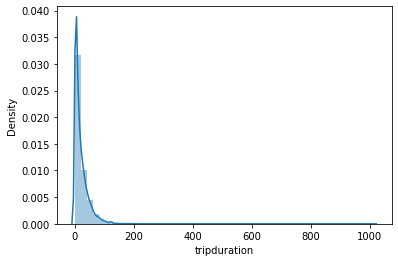

In [27]:
# the max value does not make sense. It must be an outlier, affecting our stats.
# visualise variable distribution
x = dockless['tripduration']
ax = sns.distplot(x)
plt.show()

In [28]:
# in a sub-dataset delete trip duration values above 180 min (=3 hours)
dockless_sub = dockless[dockless['tripduration'] < 180]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


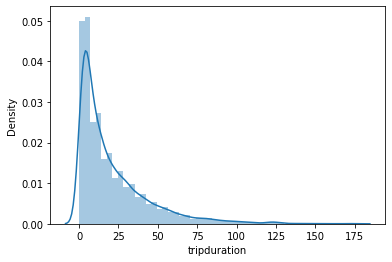

In [29]:
# plot again
x = dockless_sub['tripduration']
ax = sns.distplot(x)
plt.show()

In [30]:
# tighten to 90 min (= 1.5 hours)
dockless_sub = dockless[dockless['tripduration'] < 90]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


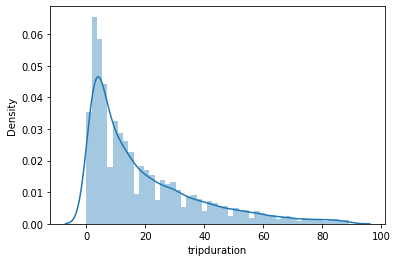

In [31]:
# plot again
x = dockless_sub['tripduration']
ax = sns.distplot(x)
plt.show()

In [32]:
# count trips per day
dockless['dayofweek'].value_counts()

Saturday     6224
Sunday       5613
Friday       5204
Thursday     4522
Wednesday    3756
Tuesday      3736
Monday       3579
Name: dayofweek, dtype: int64

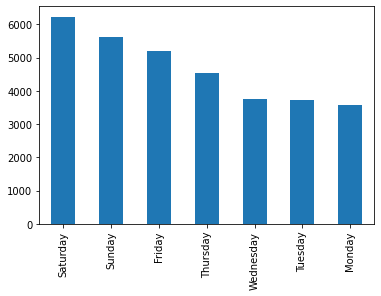

In [33]:
# plot the trips per day
# Note: COVID Lockdown trend February to June, 2020
dockless['dayofweek'].value_counts().plot(kind='bar')

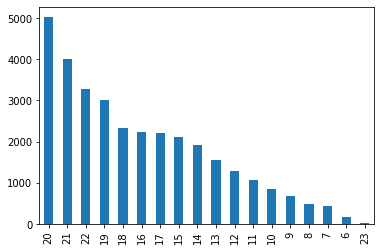

In [34]:
# plot the use of vehicles by hours of the day
dockless['hournum'].value_counts().plot(kind='bar')

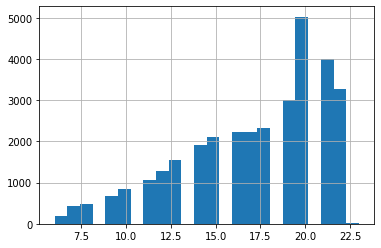

In [35]:
# same but sorted
dockless['hournum'].hist(bins = 24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6fec1a110>,
      dtype=object)

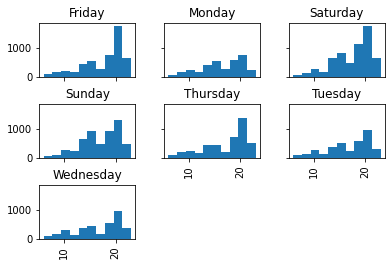

In [36]:
# is every day similar ?
dockless['hournum'].hist(by=dockless['dayofweek'], sharex=True, sharey=True)

### 3. Look for dependencies between variables:
- correlation matrix with pearson coefficient
- heatmap

In [37]:
# pearson coefficient is a correlation indicator
# generate a pearson coefficient for each peer of variables
pearson = dockless.corr(method='pearson')
pearson

tripduration  tripdistance  startlatitude  startlongitude  \
tripduration        1.000000      0.196857       0.042118        0.001216   
tripdistance        0.196857      1.000000       0.001003       -0.008190   
startlatitude       0.042118      0.001003       1.000000        0.962378   
startlongitude      0.001216     -0.008190       0.962378        1.000000   
endlatitude         0.044579      0.001737       0.997380        0.957743   
endlongitude        0.001209     -0.008059       0.962483        0.999931   
hournum             0.179893      0.012127       0.046902       -0.016459   

                endlatitude  endlongitude   hournum  
tripduration       0.044579      0.001209  0.179893  
tripdistance       0.001737     -0.008059  0.012127  
startlatitude      0.997380      0.962483  0.046902  
startlongitude     0.957743      0.999931 -0.016459  
endlatitude        1.000000      0.957829  0.047752  
endlongitude       0.957829      1.000000 -0.016485  
hournum            0.047752     -0.016485  1.000000

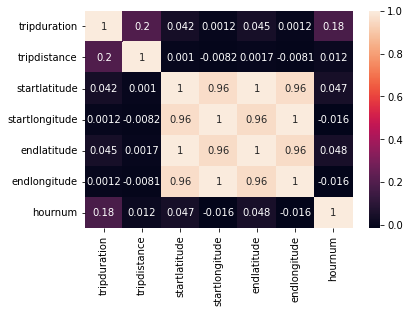

In [38]:
# visualize correlation between variables through a heatmap
sns.heatmap(pearson, annot=True)
plt.show()

### 4. Data visualization:
- plot the relationship of the most correlated variables (scatter plot of X / Y variables) => linear regression by adding a straight line on plot
- point lat/long on folium map
- draw edges between origin/destination
- aggregate datapoints to visualise it all

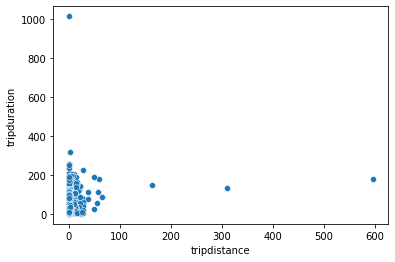

In [39]:
# scatter plot the relationship between trip distance and trip duration
sns.scatterplot(data=dockless, x="tripdistance", y="tripduration")

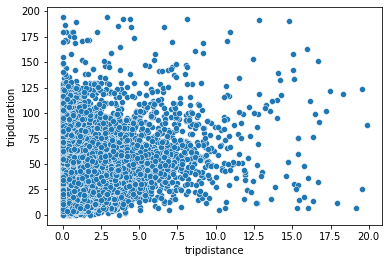

In [41]:
# plot a subset inside the crowded window
sns.scatterplot(data=dockless.loc[(dockless['tripdistance']<20) & (dockless['tripduration']<200)], x="tripdistance", y="tripduration")

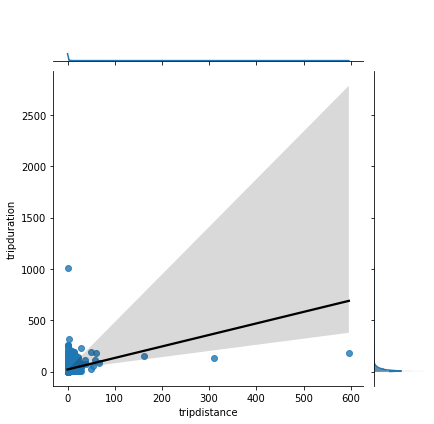

In [42]:
# add a linear regression line to the scatterplot
sns.jointplot(x="tripdistance", y="tripduration", data=dockless, kind='reg',joint_kws={'line_kws':{'color':'black'}})
# as we can see, the longer the distance, the longer the duration

<Figure size 720x720 with 0 Axes>

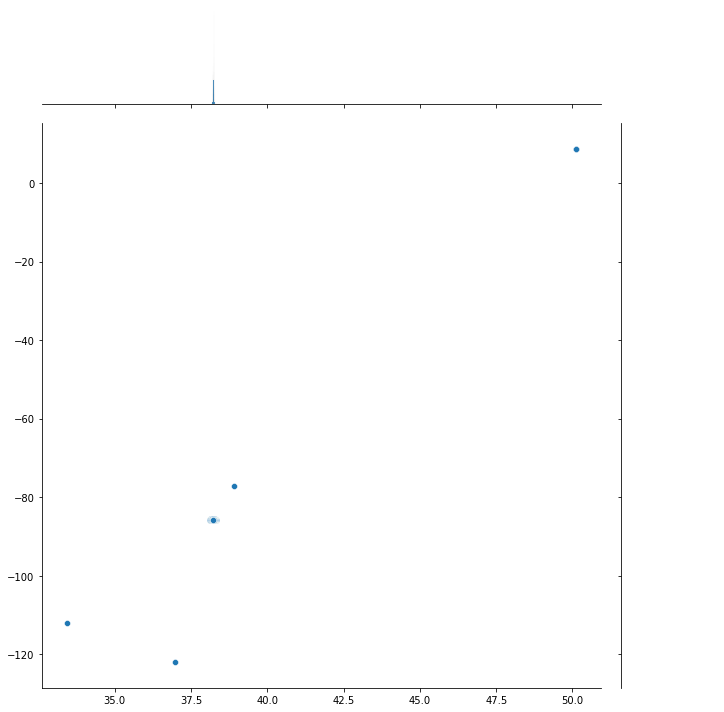

<function seaborn.utils.despine>

In [43]:
# visualise spatial distribution of data points
plt.figure(figsize = (10,10))
sns.jointplot(x=dockless.startlatitude.values, y = dockless.startlongitude.values, height = 10)
plt.ylabel('Longitude', fontsize = 12)
plt.xlabel('Latitude', fontsize = 12)
plt.show()
sns.despine
# there is hyper-concentration in center city and a few outliers

In [44]:
dockless.shape
# there are lots of datapoints

(32634, 13)

In [45]:
# random selection of 1000 data points
sample = dockless.sample(n=1000)

<Figure size 720x720 with 0 Axes>

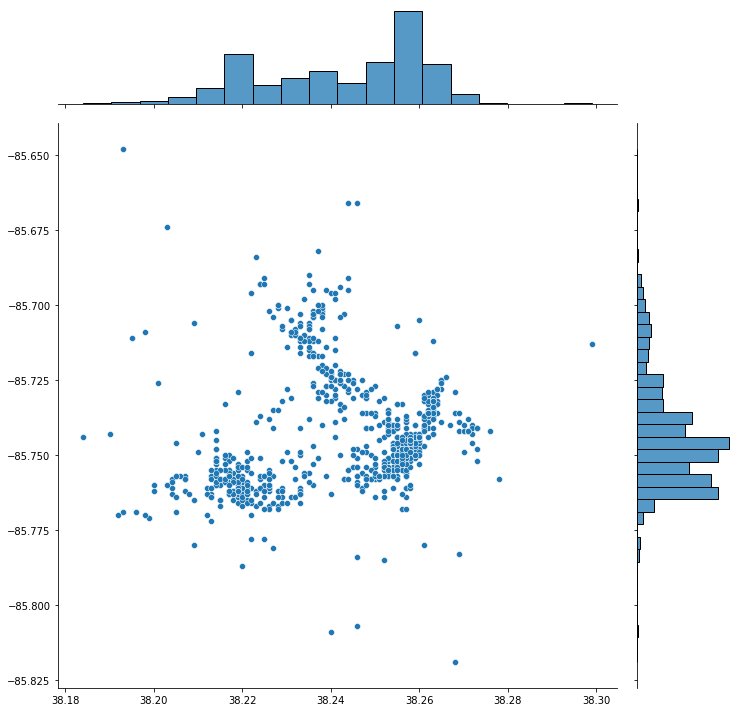

<function seaborn.utils.despine>

In [46]:
# what does our sample data looks like on this graph?
plt.figure(figsize = (10,10))
sns.jointplot(x=sample.startlatitude.values, y = sample.startlongitude.values, height = 10)
plt.ylabel('Longitude', fontsize = 12)
plt.xlabel('Latitude', fontsize = 12)
plt.show()
sns.despine

In [47]:
# visualise the spatial data points on maps
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

In [48]:
# enter Louisville coordinates
Louisville=[38.2527,-85.7585]

In [49]:
# map Louisville
map_louisville = folium.Map(location=Louisville,
                            zoom_start=12)
map_louisville

In [51]:
# map origin points
map_origin = folium.Map(location=Louisville,
                            zoom_start=12)

for lat, lng in zip(sample['startlatitude'],
                    sample['startlongitude']):
    folium.CircleMarker([lat, lng],
                        radius=2, 
                        stroke=False, 
                        fill_color='blue',
                        fill_opacity=0.5).add_to(map_origin)

map_origin

In [52]:
# cluster points to make the map more readable
map_cluster = folium.Map(location=Louisville,
                            zoom_start=12)

cluster = folium.plugins.MarkerCluster().add_to(map_cluster)

for lat, lng in zip(sample['startlatitude'],
                    sample['startlongitude']):
    folium.Marker([lat, lng]).add_to(cluster)
        
map_cluster

In [53]:
# visualise data points on a heatmap
heatmap = folium.Map(location=Louisville,
                            zoom_start=12)

HeatMap(data=sample[['startlatitude', 'startlongitude']].groupby(['startlatitude','startlongitude']).sum().reset_index().values.tolist(),
       radius=8, max_zoom=12).add_to(heatmap)

heatmap

In [54]:
# map destination points
map_destination = folium.Map(location=Louisville,
                            zoom_start=12)

for lat, lng in zip(sample['endlatitude'],
                    sample['endlongitude']):
    folium.CircleMarker([lat, lng],
                        radius=2, 
                        stroke=False, 
                        fill_color='red',
                        fill_opacity=0.5).add_to(map_destination)

map_destination

In [55]:
map_trip = folium.Map(location=Louisville,
                            zoom_start=12)

for i, row in sample.iterrows():
    folium.CircleMarker([row['startlatitude'], row['startlongitude']],
                        radius=4,
                        stroke=False,
                        fill_color='blue',
                        fill_opacity=0.7).add_to(map_trip)
    
    folium.CircleMarker([row['endlatitude'], row['endlongitude']],
                        radius=4,
                        stroke=False,
                        fill_color='red',
                        fill_opacity=0.7).add_to(map_trip)
    
    folium.PolyLine([[row['startlatitude'], row['startlongitude']],
                    [row['endlatitude'], row['endlongitude']]],
                    strokeColor= "#000000"
                   ).add_to(map_trip)

map_trip

### 5. Machine learning on mobility data
- Recall the research question
- Define X-y axes accordingly 
- split dataset in train/test subsets
- 1st run (compare accuracy scores) 
- plot predictions/actual data => want to refine your scores
- plot feature importance
- reduce feature redundancy
- 2nd run (compare accuracy scores) => better accuracy with refined datasets

# Problem statement
What data do we have at our disposal?
- origin/destination points
- trip duration
- trip distance
- day of the week
- hour of the day

Can we predict the hour of a trip from the day of the week ? NO. As seen above, all days has the same hours distribution.
Can we predict the day of the week from the trip duration ? If we can imagine that on the weekend the users are riding longer trips since they have more time, so far, we haven't found any evidence in the correlation matrix.
Can we predict the trip duration from the trip distance ? YES. Is it meaningful? Yes, as all GPS always predict your time of arrival when you enter a destination.

### We will use machine learning to predict the trip duration from a distance between origin and destination points.

#### since trip duration is a continuous numerical value, we will use regression models of ML
suppose we had a categorical value to predict, we would have used classification models

In [56]:
dockless.dtypes

tripid             object
startdate          object
starttime          object
enddate            object
endtime            object
tripduration        int64
tripdistance      float64
startlatitude     float64
startlongitude    float64
endlatitude       float64
endlongitude      float64
dayofweek          object
hournum             int64
dtype: object

In [57]:
# define X-y axis, excluding non-numerical values
y = dockless['tripduration'] # dependent variable
X = dockless.select_dtypes(exclude=['object']).drop(['tripduration'], axis=1)

In [58]:
# split dataset in train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 100)
# usually 2/3 train and 1/3 test selected randomly

In [59]:
# linear regression
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr_model =lr.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

In [60]:
# calculate statistical measures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statistics

MAE = mean_absolute_error(y_test, lr_pred)
MSE = mean_squared_error(y_test, lr_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, lr_pred)
print("MAE: %6.2f" % (MAE))
print("MSE: %6.2f" % (MSE))
print("RMSE: %6.2f" % (RMSE))
print("R2: %6.2f" % (R2))

MAE:  15.04
MSE: 619.69
RMSE:  24.89
R2:  -0.15


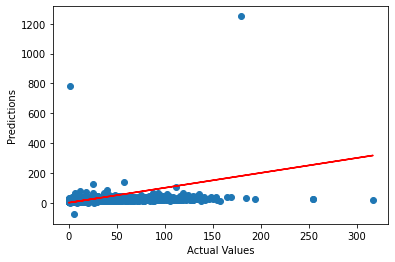

In [61]:
# Visualizing model performance
plt.scatter(y_test, lr_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')

# Ideal predictions plot
plt.plot(y_test,y_test,'r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


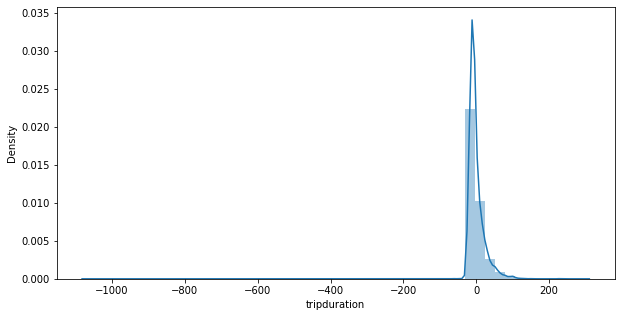

In [62]:
# Plotting residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- lr_pred)
sns.distplot(residuals)

#### not bad at all for a first run, but we will try to make it better (MAE < 5)
- one way will be to use a meta estimator such as decision tree regressor to identify which feature contribute the most to the trip duration.

In [63]:
# import library
from sklearn.tree import DecisionTreeRegressor

# define the model with DecisionTreeRegressor
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

0.3853942117421507
Feature: 0, Score: 0.38539
Feature: 1, Score: 0.10988
Feature: 2, Score: 0.15991
Feature: 3, Score: 0.14500
Feature: 4, Score: 0.11747
Feature: 5, Score: 0.08235


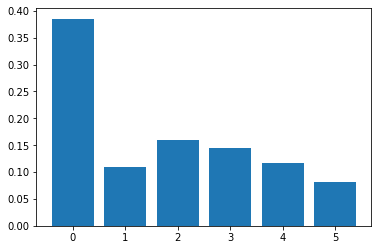

In [64]:
importance = model.feature_importances_

print(importance[0])

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### pretty clear that trip distance is the only feature of valuable importance to predict trip duration

In [65]:
# recursive feature elimination
from sklearn.feature_selection import RFE

# define method
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=1)
# fit the model
rfe.fit(X,y)
# transform the data
X_rfe = rfe.transform(X)
print("num features: %d" % rfe.n_features_)
print("selected features: %s" % rfe.support_)
print("feature ranking: %s" % rfe.ranking_)

num features: 1
selected features: [ True False False False False False]
feature ranking: [1 3 5 4 2 6]


In [66]:
# train/test split the new dataset
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size = 0.33, random_state = 100)

In [67]:
# linear regression on refined dataset
lr = linear_model.LinearRegression()
lr_model =lr.fit(X_train, y_train)

lr_pred2 = lr_model.predict(X_test)

In [68]:
# performance metrics
MAE2 = mean_absolute_error(y_test, lr_pred2)
MSE2 = mean_squared_error(y_test, lr_pred2)
RMSE2 = np.sqrt(MSE)
R22 = r2_score(y_test, lr_pred2)
print("MAE: %6.2f" % (MAE2))
print("MSE: %6.2f" % (MSE2))
print("RMSE: %6.2f" % (RMSE2))
print("R2: %6.2f" % (R22))

MAE:  16.04
MSE: 602.48
RMSE:  24.89
R2:  -0.12


#### Reducing features didn't made the predictions better. 
It seems that the other variables such as origin/destination positions slightly plays a role in the trip duration too.

- another way to improve our machine learning algorithm will be to delete outliers from the dataset

In [69]:
# remember dockless_sub with trip duration < 90 min ? redefine X-y axis
y_sub = dockless_sub['tripduration'] # dependent variable
X_sub = dockless_sub.select_dtypes(exclude=['object']).drop(['tripduration'], axis=1)

In [70]:
# split sub dataset in train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size = 0.33, random_state = 100)

In [71]:
# linear regression
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr_model =lr.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

In [72]:
# calculate statistical measures
MAE = mean_absolute_error(y_test, lr_pred)
MSE = mean_squared_error(y_test, lr_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, lr_pred)
print("MAE: %6.2f" % (MAE))
print("MSE: %6.2f" % (MSE))
print("RMSE: %6.2f" % (RMSE))
print("R2: %6.2f" % (R2))

MAE:  12.25
MSE: 354.87
RMSE:  18.84
R2:  -0.01


### better but we can try to improve it again

In [73]:
# as most courses are short check on a trip duration < 20
dockless_sub = dockless_sub[dockless_sub['tripdistance'] < 20]

In [74]:
# remember dockless_sub with trip duration < 90 min ? redefine X-y axis
y_sub = dockless_sub['tripduration'] # dependent variable
X_sub = dockless_sub.select_dtypes(exclude=['object']).drop(['tripduration'], axis=1)

In [75]:
# split sub dataset in train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size = 0.33, random_state = 100)

In [76]:
# linear regression
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr_model =lr.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

In [77]:
# calculate statistical measures
MAE = mean_absolute_error(y_test, lr_pred)
MSE = mean_squared_error(y_test, lr_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, lr_pred)
print("MAE: %6.2f" % (MAE))
print("MSE: %6.2f" % (MSE))
print("RMSE: %6.2f" % (RMSE))
print("R2: %6.2f" % (R2))

MAE:  12.10
MSE: 282.73
RMSE:  16.81
R2:   0.20


# from 15 MAE we decreased to 12.

## Conclusion:
- this is how we program intelligent machines, by testing combinations of data and looping through datasets to reach the best predictive performances.
- when your accuracy score reachs a threshold value (usually >95%) you can deploy your model for production on completely new datasets and assume the predictions will be statistically valid. 
- in a more advanced fashion, we could make predictions on time or spatial data: for example trying to predict the car traffic or the destination of a trip depending its origin and duration.
### Artificial intelligences are probabilities and statistics performed by performative brains (machines)!

## => Now your turn! Do the same with "Louisville-Dockless-Trips.csv" file. Follow the notebook line by line, fill the code with your data specificities